# Fast dmdt method
### Ashish Mahabal <aam at astro.caltech.edu>
### 2018-11-12

### Imports

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

### Read data
#### 'KeplerSampleFullQ.npy' has 2500 light curves. Each is a array with columns: time, mag, magerr
#### We will use the 251st light curve as out example

In [9]:
kdata = np.load('KeplerSampleFullQ.npy',encoding='bytes')
print(kdata.shape)
print(len(kdata[250][0]))

(2500, 3)
3534


#### plot the light curve

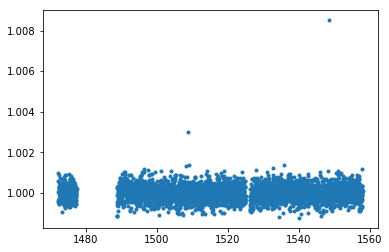

In [10]:
plt.plot(kdata[250][0],kdata[250][1],'.')

In [11]:
# Usage: xd = pairwisediffs(kdata[250][0]); yd = pairwisediffs(kdata[250][1])
def pairwisediffs(arrayoned):
    x = arrayoned.reshape((1,len(arrayoned)))
    xdm = x[:] - np.transpose(x[:])
    xd = xdm[np.triu_indices(len(x[0]), k = 1)]
    return(xd)

In [12]:
xd = pairwisediffs(kdata[250][0])
yd = pairwisediffs(kdata[250][1])

### get the dmints and dtints

In [13]:
dmints = [-0.01, -0.006, -0.005, -0.004, -0.0012, -0.001, -0.0009, -0.0007, 
          -0.0006, -0.0005, -0.0004, -0.0003, -0.0002, -0.00015, -0.0001, 
          -0.00005, 0, 0.00005, 0.0001, 0.0002, 0.0003, 0.001, 0.0012, 0.003, 
          0.004, 0.005, 0.006, 0.01, 0.02]
dtints = [-1.0/145, 20.0/145, 30.0/145, 45.0/145, 60.0/145, 80.0/145, 90.0/145, 
          100.0/145, 120.0/145,  140.0/145, 1.0,  1.1, 1.2,  
          1.3,  1.4,  1.5, 1.7,  2, 2.25,  2.5, 3.0, 6 , 9, 15, 20, 30, 45, 60, 90]

### Plot the 2D histogram with native bins (as defined above)
### H[0] contains the densities, H[1] and H[2] contain the binedges, H[3] is meshgrid
### The x- and y-bins as shown are unequal sized

In [14]:
H = plt.hist2d(xd,yd,bins=[dtints,dmints],range=None,normed=False)
plt.colorbar(H[3])

TypeError: 'NoneType' object is not iterable

### Using equal sized bins (default to hist) shows how the x (dt) distribution is

(array([494322., 448183., 421353., 401424., 396411., 392651., 372262.,
        348814., 328087., 306363., 288164., 271315., 257014., 235546.,
        213473., 189736., 161395., 144455., 125884., 104740.,  83795.,
         61761.,  41305.,  37168.,  36984.,  37047.,  32079.,  11080.]),
 array([2.04330702e-02, 3.08549384e+00, 6.15055460e+00, 9.21561537e+00,
        1.22806761e+01, 1.53457369e+01, 1.84107977e+01, 2.14758584e+01,
        2.45409192e+01, 2.76059800e+01, 3.06710407e+01, 3.37361015e+01,
        3.68011623e+01, 3.98662230e+01, 4.29312838e+01, 4.59963446e+01,
        4.90614053e+01, 5.21264661e+01, 5.51915269e+01, 5.82565876e+01,
        6.13216484e+01, 6.43867092e+01, 6.74517699e+01, 7.05168307e+01,
        7.35818915e+01, 7.66469522e+01, 7.97120130e+01, 8.27770738e+01,
        8.58421345e+01]),
 <a list of 28 Patch objects>)

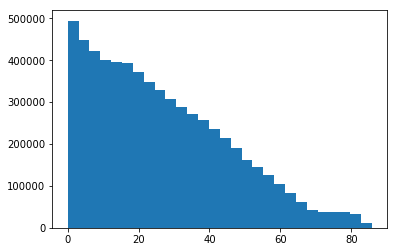

In [15]:
plt.hist(xd,bins=28)

### and this is how it is with the bins we have defined
### Clearly, the first few have very few points in them
### Note that the bins have different sizes

(array([  20826.,   13820.,   17221.,   17142.,   23848.,   10224.,
          10166.,   23611.,   23470.,    3340.,   16657.,   16585.,
          16531.,   16478.,   16428.,   32706.,   45455.,   41866.,
          38357.,   75874.,  440693.,  414197.,  782903.,  631291.,
        1096018., 1263318.,  750052.,  383734.]),
 array([-6.89655172e-03,  1.37931034e-01,  2.06896552e-01,  3.10344828e-01,
         4.13793103e-01,  5.51724138e-01,  6.20689655e-01,  6.89655172e-01,
         8.27586207e-01,  9.65517241e-01,  1.00000000e+00,  1.10000000e+00,
         1.20000000e+00,  1.30000000e+00,  1.40000000e+00,  1.50000000e+00,
         1.70000000e+00,  2.00000000e+00,  2.25000000e+00,  2.50000000e+00,
         3.00000000e+00,  6.00000000e+00,  9.00000000e+00,  1.50000000e+01,
         2.00000000e+01,  3.00000000e+01,  4.50000000e+01,  6.00000000e+01,
         9.00000000e+01]),
 <a list of 28 Patch objects>)

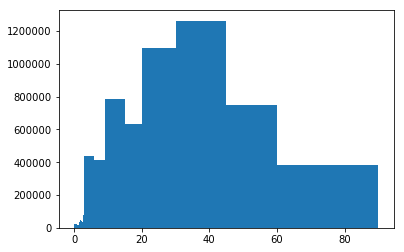

In [16]:
plt.hist(xd,bins=dtints)

### Using equal sized bins shows how the y (dm) distribution is

(array([4.460000e+02, 2.000000e+00, 9.700000e+01, 6.877000e+03,
        3.926791e+06, 2.303959e+06, 1.548000e+03, 7.000000e+00,
        1.300000e+02, 2.954000e+03]),
 array([-0.00938731, -0.00747487, -0.00556242, -0.00364998, -0.00173753,
         0.00017491,  0.00208735,  0.0039998 ,  0.00591224,  0.00782469,
         0.00973713]),
 <a list of 10 Patch objects>)

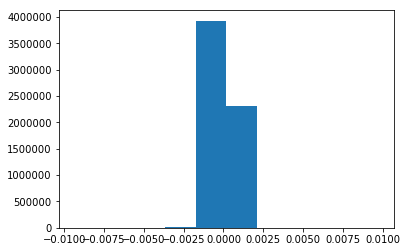

In [17]:
plt.hist(yd)

### ... and this is how it is with the bins we have defined
### Clearly, several on either side have very few points in them
### Here the bins are more symmetric (though still unequal sized)

(array([4.480000e+02, 0.000000e+00, 7.000000e+00, 9.282400e+04,
        1.240310e+05, 1.016680e+05, 3.155940e+05, 2.258530e+05,
        2.761270e+05, 3.267940e+05, 3.750930e+05, 4.132870e+05,
        2.177630e+05, 2.241480e+05, 2.269580e+05, 2.282410e+05,
        2.288950e+05, 2.253410e+05, 4.379540e+05, 4.095640e+05,
        1.582919e+06, 1.191020e+05, 8.653500e+04, 5.740000e+02,
        6.000000e+00, 1.000000e+00, 3.084000e+03, 0.000000e+00]),
 array([-1.0e-02, -6.0e-03, -5.0e-03, -4.0e-03, -1.2e-03, -1.0e-03,
        -9.0e-04, -7.0e-04, -6.0e-04, -5.0e-04, -4.0e-04, -3.0e-04,
        -2.0e-04, -1.5e-04, -1.0e-04, -5.0e-05,  0.0e+00,  5.0e-05,
         1.0e-04,  2.0e-04,  3.0e-04,  1.0e-03,  1.2e-03,  3.0e-03,
         4.0e-03,  5.0e-03,  6.0e-03,  1.0e-02,  2.0e-02]),
 <a list of 28 Patch objects>)

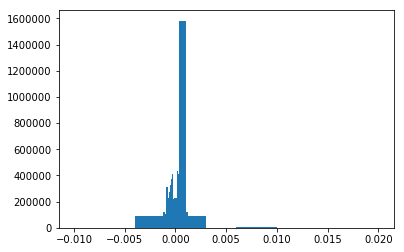

In [18]:
plt.hist(yd,bins=dmints)

#### Plot the 2d histogram using equalsized pixels

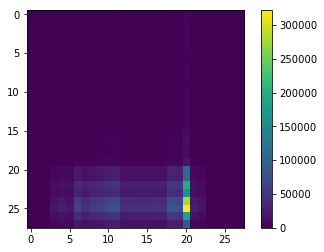

In [19]:
plt.imshow(H[0])
plt.colorbar()

#### Normalize H by sum

255.0


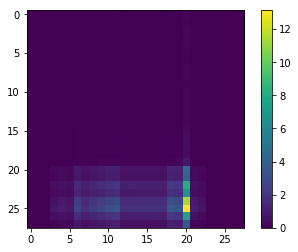

In [20]:
G = 255*H[0]/np.sum(H[0])
plt.imshow(G)
plt.colorbar()
print(np.sum(G))

In [21]:
# USAGE: fastdmdt = get2dhist([kdata[250][0],kdata[250][1]])
def get2dhist(lightcurve):
    xd = pairwisediffs(lightcurve[0])
    yd = pairwisediffs(lightcurve[1])
    H,xe,ye = np.histogram2d(xd,yd,bins=[dtints,dmints],range=None,normed=False)
    G = 255*H/np.sum(H)
    return G

#### Store G along with dmints and dtints used to calculate it
#### Ideal to do this for all light curves, and store dtints and dmints only once

In [22]:
fastdmdt = get2dhist([kdata[250][0],kdata[250][1]])

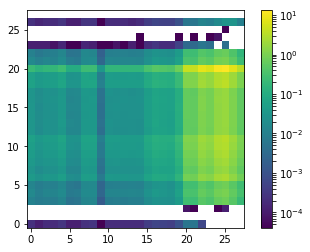

In [23]:
plt.imshow(fastdmdt.T,  norm = LogNorm(), origin="lower")
plt.colorbar()

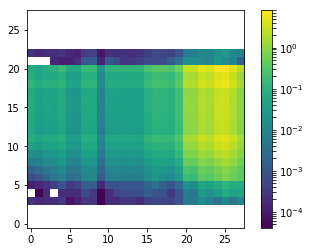

In [24]:
fastdmdt = get2dhist([kdata[25][0],kdata[25][1]])
plt.imshow(fastdmdt.T,  norm = LogNorm(), origin="lower")
plt.colorbar()

In [25]:
def plotme(n):
    fastdmdt = get2dhist([kdata[n][0],kdata[n][1]])
    plt.imshow(fastdmdt.T,  norm = LogNorm(), origin="lower")
    plt.colorbar()

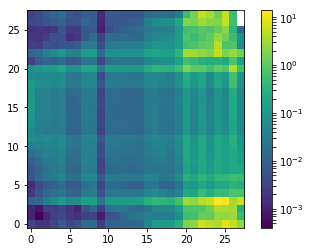

In [26]:
plotme(0)

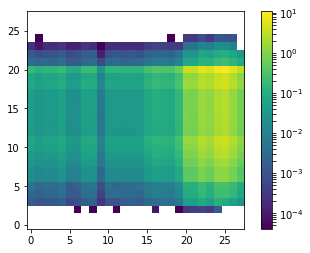

In [27]:
plotme(1)

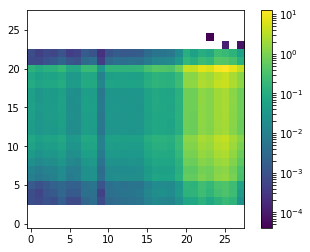

In [28]:
plotme(2)